In [30]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [18]:
crashes2 = pd.read_csv("Resources/Traffic_Crashes_-_Crashes_2017-2018.csv", low_memory=False)
crashes2.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC101797,NaN,12/31/2018 23:58,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,UNKNOWN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,...,0.0,0.0,3.0,0.0,23,2,12,41.884754,-87.711230,POINT (-87.711229788593 41.884753676395)
1,JC100021,NaN,12/31/2018 23:55,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,2,12,41.660397,-87.618035,POINT (-87.618034685178 41.660397249396)
2,JC100053,NaN,12/31/2018 23:53,35,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,2.0,0.0,23,2,12,41.873324,-87.616936,POINT (-87.616936372647 41.873324106032)
3,JC100465,Y,12/31/2018 23:45,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,23,2,12,41.809188,-87.666049,POINT (-87.66604894842 41.809188458401)
4,JC100032,Y,12/31/2018 23:45,30,NO CONTROLS,NO CONTROLS,RAIN,"DARKNESS, LIGHTED ROAD",REAR END,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,2,12,41.891682,-87.632731,POINT (-87.632730713447 41.891682323987)


In [38]:
month_group = crashes2.groupby('CRASH_MONTH')
month_df = pd.DataFrame(month_group.count()[["RD_NO"]]/2)
month_df.rename(columns={'RD_NO': 'Crash Count'},inplace=True)
month_df.head()

,Crash Count
CRASH_MONTH,
1,6945.5
2,6409.5
3,7191.5
4,7314.5
5,8248.5


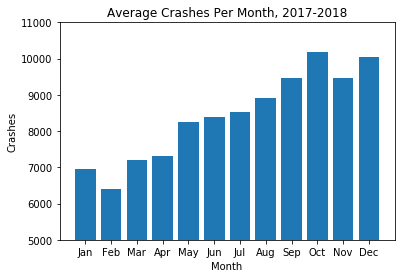

In [41]:
fig, ax = plt.subplots()
ax.bar(month_df.index.values,month_df['Crash Count'])

# Orient widths. Add labels, tick marks, etc. 
ax.set_title("Average Crashes Per Month, 2017-2018")
ax.set_xlabel("Month")
ax.set_ylabel("Crashes")
# ax.grid()
ax.set_xticks(month_df.index.values)
# ax.set_ylim(-30, 70)

ax.set_ylim(5000,11000)
# plt.xticks(month_df.index.values)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
# i = 0
# for index, row in crashes2.iterrows():
#     crash_date = crashes2["CRASH_DATE"][index]
#     date_placeholder = crash_date.split()[0]
#     crashes2["Month"][index] = date_placeholder.split('/')[0]
#     i += 1
#     if i % 1000 == 0:
#         print(f"{i} records processed...")
# crashes2.head()
plt.savefig("Crashes_vs_Month.png")